### 1. Problem Definition
> Given clinical information about a patient, can we make a model that can predict whether or not a patient has heart disease? This is a binary classification problem.

### 2. Data
> The data is burrowed from this link: https://www.kaggle.com/ronitf/heart-disease-uci. This dataset contained tons of features, but it has been simplified to just 14 features.

### 3. Evaluation
> The goal is to achieve over 95% accuracy at predicting whether or not a patient has heart disease. To evaluate the prediction model, standard evaluation metrics will be used. These metrics include the following: 
* Accuracy
* Classification Report
* Confusion Matrix
* Cross Validation Score on 10 Folds

### 4. Features
> * age in years
* sex (1 male, 0 female)
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
data = pd.read_csv('heart-disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# 303 rows of data, and each row containing 14 features
data.shape

(303, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

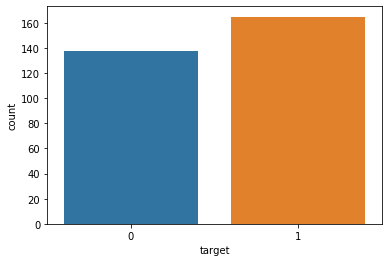

In [7]:
# A lot more data with label 1
sns.countplot(data['target']);

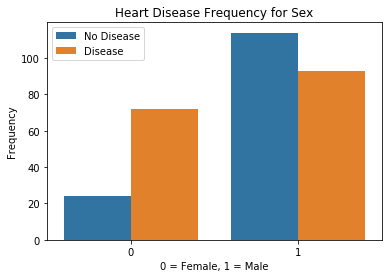

In [8]:
# A lot more males in the dataset compared to females
sns.countplot(data['sex'], hue=data['target'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = Female, 1 = Male")
plt.ylabel("Frequency")
plt.legend(['No Disease', 'Disease'])

Text(0, 0.5, 'Max Heart Rate')

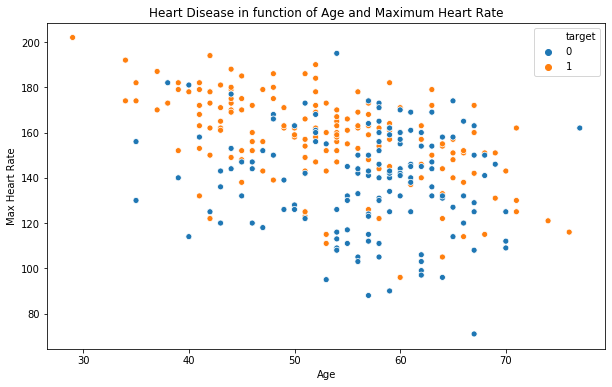

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['age'], y=data['thalach'], hue=data['target'])
plt.title("Heart Disease in function of Age and Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")

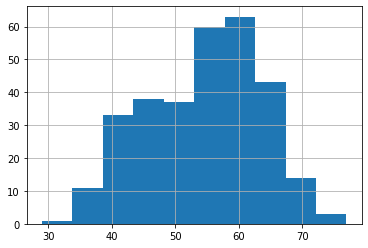

In [10]:
# Check the distribution of the age
# The dataset contains a lot of senior patients
data['age'].hist()

Chest pain types:
* Value 1: typical angina 
* Value 2: atypical angina 
* Value 3: non-anginal pain 
* Value 4: asymptomatic 

Text(0.5, 1.0, 'Chest Pain Types and Heart Disease')

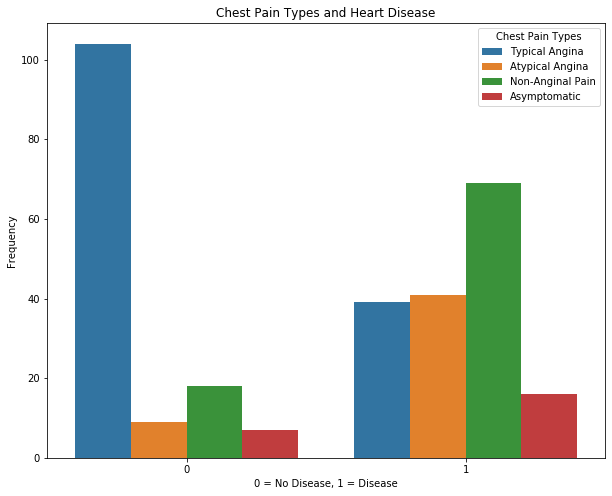

In [11]:
plt.figure(figsize=(10, 8))
sns.countplot(hue=data['cp'], x=data['target'])
plt.legend(title="Chest Pain Types", labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Frequency")
plt.title("Chest Pain Types and Heart Disease")

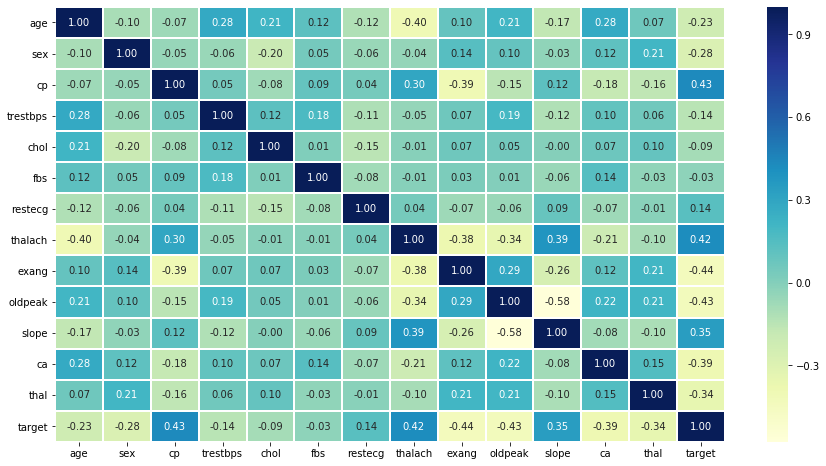

In [12]:
# Make a correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, linewidths=1, cmap='YlGnBu', fmt='.2f')
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [13]:
### Modelling

In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
X = data.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [16]:
y = data['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [17]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((242, 13), (242,)), ((61, 13), (61,)))

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Try three different classification algorithms
# and train them 
models = {'Logistic Regression': LogisticRegression(), 
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(n_estimators=100)}

def train_model(models, X_train, X_test, y_train, y_test):
    scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test, y_test)
    return scores

In [20]:
trained_models = train_model(models, X_train, X_test, y_train, y_test)
trained_models

C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.819672131147541,
 'Random Forest': 0.9016393442622951}

Text(0, 0.5, 'Accuracy')

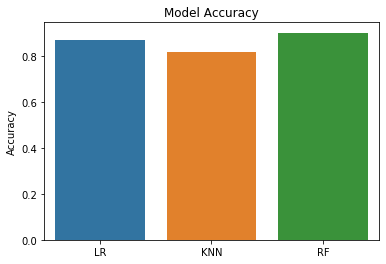

In [21]:
# Plot the scores
sns.barplot(x=['LR', 'KNN', 'RF'], y=list(trained_models.values()))
plt.title("Model Accuracy")
plt.ylabel("Accuracy")

### KNN Hyperparameter Tuning

In [22]:
train_scores = []
test_scores = []

for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    model_score = model.score(X_test, y_test)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

In [23]:
train_scores, max(train_scores)

([1.0,
  0.871900826446281,
  0.871900826446281,
  0.8677685950413223,
  0.8884297520661157,
  0.8636363636363636,
  0.8347107438016529,
  0.8388429752066116,
  0.8388429752066116,
  0.859504132231405,
  0.8305785123966942,
  0.8223140495867769,
  0.8347107438016529,
  0.8471074380165289,
  0.8471074380165289,
  0.8429752066115702,
  0.8429752066115702,
  0.8471074380165289,
  0.8347107438016529,
  0.8388429752066116],
 1.0)

In [24]:
test_scores, max(test_scores)

([0.7704918032786885,
  0.8360655737704918,
  0.8360655737704918,
  0.8360655737704918,
  0.819672131147541,
  0.8524590163934426,
  0.8524590163934426,
  0.8688524590163934,
  0.8688524590163934,
  0.8688524590163934,
  0.8524590163934426,
  0.8524590163934426,
  0.819672131147541,
  0.8524590163934426,
  0.819672131147541,
  0.819672131147541,
  0.819672131147541,
  0.8360655737704918,
  0.8360655737704918,
  0.8524590163934426],
 0.8688524590163934)

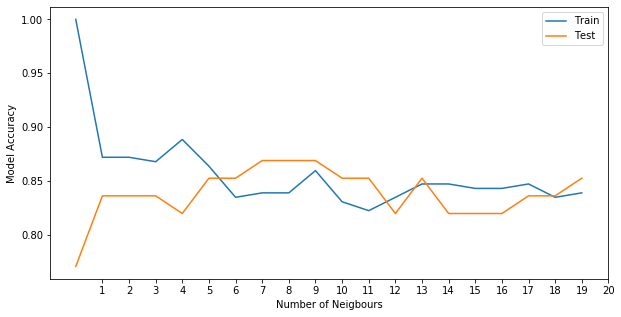

In [25]:
# Plot the train and test scores

plt.figure(figsize=(10, 5))
plt.plot(train_scores, label='Train Score')
plt.plot(test_scores, label='Test Score')
plt.legend(['Train', 'Test'])
plt.xlabel("Number of Neigbours")
plt.ylabel("Model Accuracy")
plt.xticks(ticks=range(1, 21, 1));

In [26]:
print(f"KNN max training score: {max(train_scores) * 100:.2f}%")
print(f"KNN max testing score: {max(test_scores) * 100:.2f}%")

KNN max training score: 100.00%
KNN max testing score: 86.89%


### Hyperparameter Tuning with RandomizedSearchCV

In [27]:
# Create the hyperparameters dictionary

log_reg_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 2, 2)}

In [28]:
rssss = RandomForestClassifier()
rssss.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [29]:
logistic_regression_rs = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

logistic_regression_rs.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 7 is smaller than n_iter=20. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anish\Anaconda3\li

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=

In [30]:
logistic_regression_rs.best_params_

{'C': 0.01}

In [31]:
y_preds = logistic_regression_rs.predict(X_test)
y_preds

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [32]:
logistic_regression_rs.score(X_test, y_test)

0.8524590163934426

#### RandomForest Hyperparameter Tuning

In [33]:
random_forest_rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, n_iter=20, cv=5, verbose=True)
random_forest_rs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   33.4s finished
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [34]:
random_forest_rs.best_params_

{'n_estimators': 110,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': None}

In [35]:
random_forest_rs.score(X_test, y_test)

0.8524590163934426

### Hyperparameter Tuning Using GridSearchCV

In [36]:
log_reg_grid = {'C': np.logspace(-4, 4, 50),
                'solver': ['liblinear']}
log_reg_grid_search = GridSearchCV(LogisticRegression(), log_reg_grid, cv = 10, verbose=True)
log_reg_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.000000...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.

In [37]:
log_reg_grid_search.best_params_

{'C': 0.18420699693267145, 'solver': 'liblinear'}

In [38]:
log_reg_grid_search.score(X_test, y_test)

0.8688524590163934

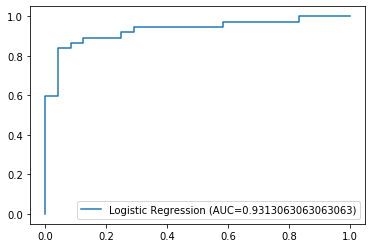

In [39]:
y_preds_prob = log_reg_grid_search.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_preds_prob)

auc = roc_auc_score(y_test, y_preds_prob)
plt.plot(fpr, tpr, label="Logistic Regression (AUC=" + str(auc) + ")")
plt.legend(loc=4)
plt.show()

In [49]:
# Calculate the evaluation metrics using cross-validation
accuracy_score = cross_val_score(log_reg_grid_search, X, y, scoring='accuracy', cv=5, n_jobs=-1)
print(f"Average accuracy score: {np.mean(accuracy_score)}")

precision_score = cross_val_score(log_reg_grid_search, X, y, scoring='precision', cv=5, n_jobs=-1)
print(f"Average precision score: {np.mean(precision_score)}")

recall_score = cross_val_score(log_reg_grid_search, X, y, scoring='recall', cv=5, n_jobs=-1)
print(f"Average recall score: {np.mean(recall_score)}")

f1_score = cross_val_score(log_reg_grid_search, X, y, scoring='f1', cv=5, n_jobs=-1)
print(f"Average f1-score score: {np.mean(f1_score)}")

Average accuracy score: 0.8381420765027322
Average precision score: 0.8151685226936303
Average recall score: 0.9151515151515153
Average f1-score score: 0.8611043477704985
